# Heart Desease Prediction

## Goal: To check the presence of heart desease in the patient

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('heart.csv')
df.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  
8   0     3       1  
9   0     2       1

Data contains; <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

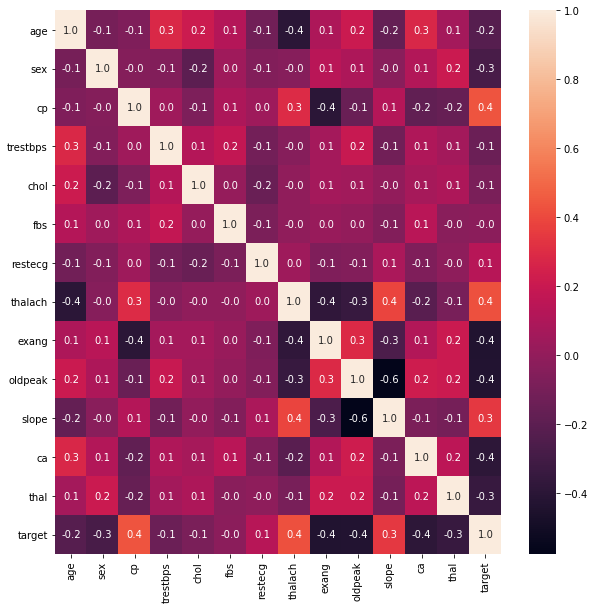

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.1f')  # fmt='0.1f' means one factor after decimal

In [17]:
X=df.iloc[:,0:13]
y=df.iloc[:,13]

X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(14,'Score')) #print best features


       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271
5        fbs    0.202934


<function matplotlib.pyplot.show(close=None, block=None)>

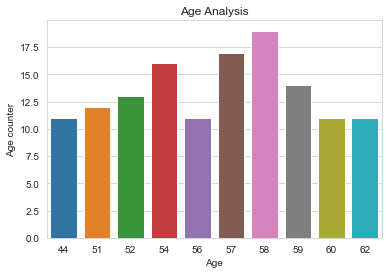

In [153]:
#age analysis
df.age.value_counts()[:10]

sns.barplot(x= df.age.value_counts()[:10].index, y= df.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel("Age counter")
plt.title("Age Analysis")
plt.show

Text(0.5, 1.0, 'Patients having(1) and not having (0) heart problem')

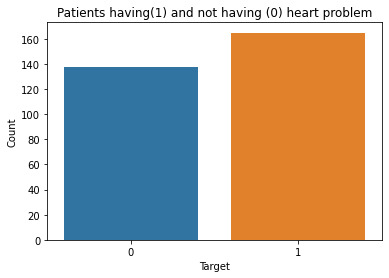

In [101]:
sns.countplot(df.target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Patients having(1) and not having (0) heart problem')

In [76]:
x_f=df[(df['sex']==0) & (df['target']==1)]
x_m=df[(df['sex']==1) & (df['target']==1)]
f_desease=len(x_f)
m_desease=len(x_m)
total=len(df.sex)
print('Female patients= ',f_desease)
print('Male patients= ',m_desease)

Female patients=  72
Male patients=  93


In [77]:

total=len(df.sex)
print('Female patients having heart desease= ',(f_desease/total)*100,'%')
print('Male patients having heart desease= ',(m_desease/total)*100,'%')

Female patients having heart desease=  23.762376237623762 %
Male patients having heart desease=  30.693069306930692 %


In [81]:
young=df[(df['age']>22)&(df['age']<40)]
young=len(young)
middle=df[(df['age']>=40)&(df['age']<55)]
middle=len(middle)
old=df[df['age']>=55]
old=len(old)
print('Young patients are: ', (young/total)*100,'%')
print('Middle aged patients are: ', (middle/total)*100,'%')
print('Old patients are: ', (old/total)*100,'%')

Young patients are:  5.2805280528052805 %
Middle aged patients are:  42.244224422442244 %
Old patients are:  52.475247524752476 %


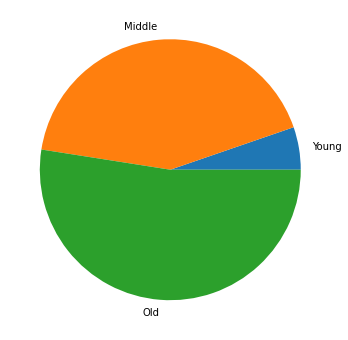

In [85]:
plt.figure(figsize=(6,6))
plt.pie([young,middle,old],labels=['Young','Middle','Old'])
plt.show()

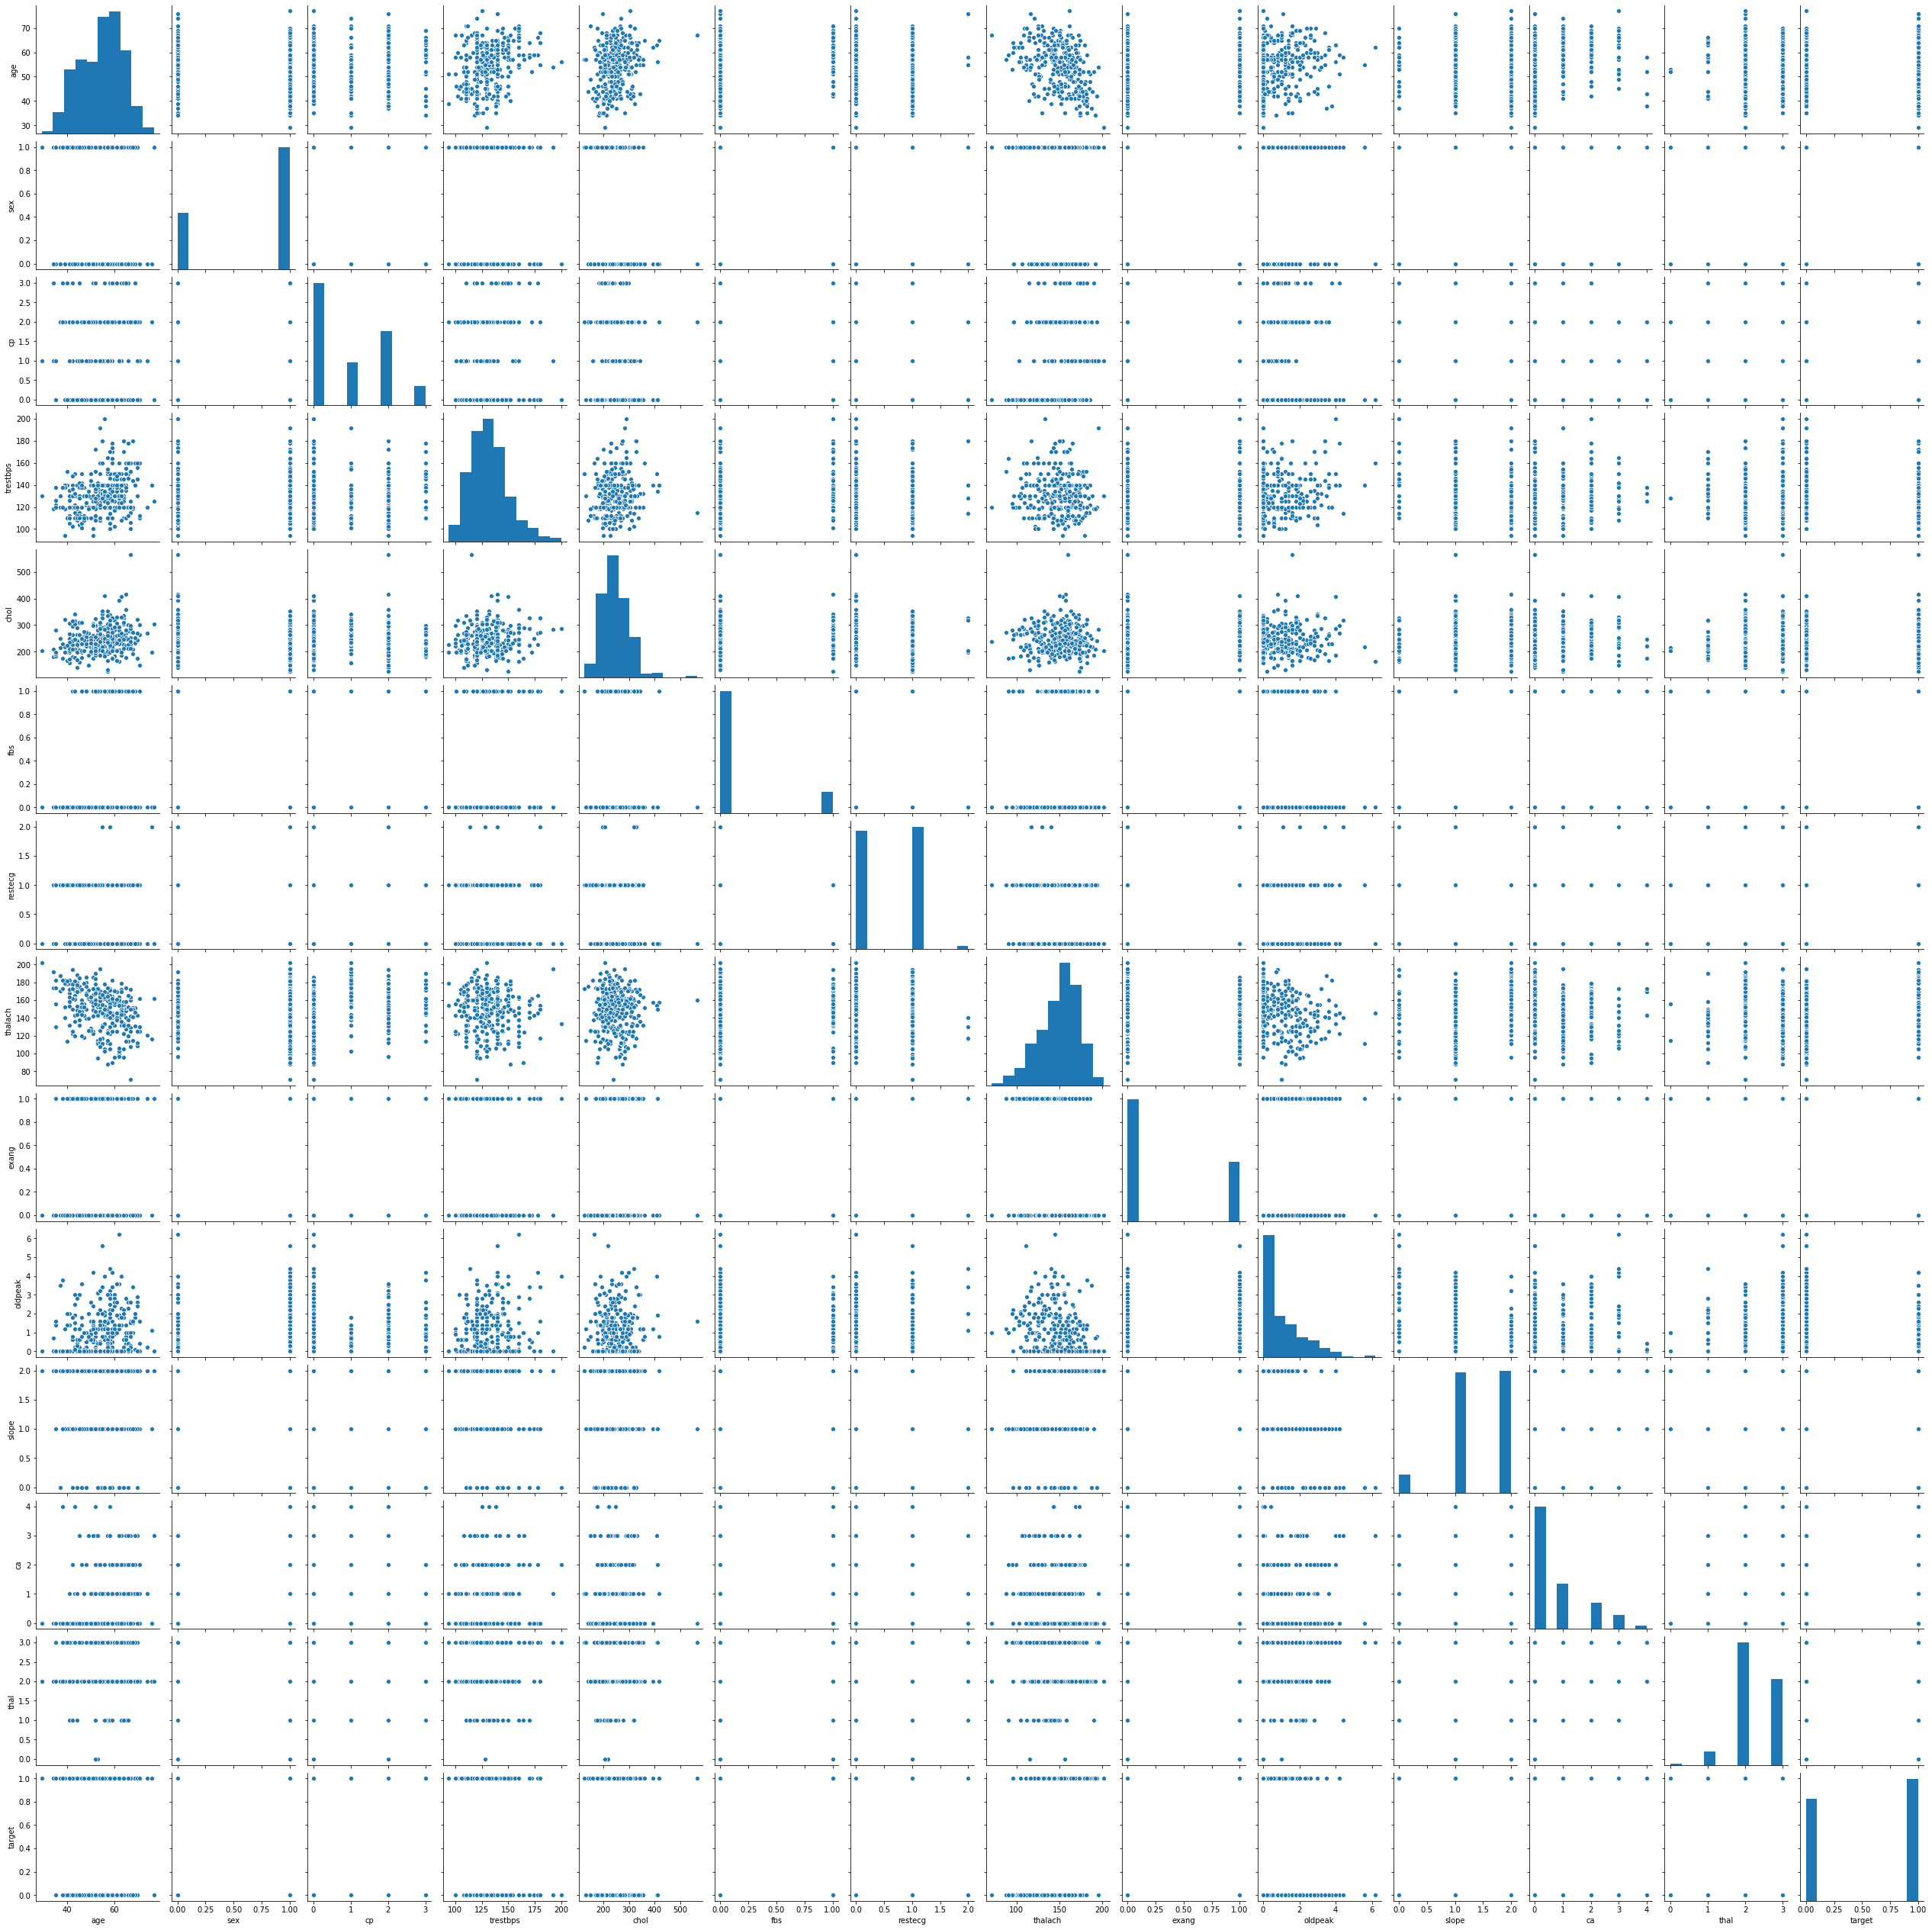

In [95]:
sns.pairplot(df)

### Normalize

In [124]:
X=(X-np.min(X))/(np.max(X)-np.min(X)).values
X.head()

age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053    0.0   
1  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496    0.0   
2  0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992    0.0   
3  0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794    0.0   
4  0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290    1.0   

    oldpeak  slope   ca      thal  
0  0.370968    0.0  0.0  0.333333  
1  0.564516    0.0  0.0  0.666667  
2  0.225806    1.0  0.0  0.666667  
3  0.129032    1.0  0.0  0.666667  
4  0.096774    1.0  0.0  0.666667

## Model building

### Logistic regression

In [133]:
accuracies = {}

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

lr.fit(x_train,y_train)
acc= lr.score(x_test,y_test)*100
accuracies['Logistic']=acc
print('The accuracy of Logistic regression is: ',acc,'%')

The accuracy of Logistic regression is:  83.60655737704919 %


### KNN model

In [136]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

acc=knn.score(x_test, y_test)*100
accuracies['KNN model']=acc
print("KNN accuracy:",format(acc),'%')

KNN accuracy: 86.88524590163934 %


### Support vector

In [137]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

acc=svm.score(x_test, y_test)*100
accuracies['Support vector']=acc
print("SVC accuracy: ",format(acc),'%')

SVC accuracy:  83.60655737704919 %


### Naive Bayes

In [138]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

acc=nb.score(x_test, y_test)*100
accuracies['Naive Bayes']=acc
print("NB accuracy: ",format(acc),'%')

NB accuracy:  85.24590163934425 %


### Random forest

In [140]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state= 1)
rf.fit(x_train, y_train)

acc=rf.score(x_test, y_test)*100
accuracies['Random forest']=acc
print("Random Forest accuracy: ",format(acc),'%')

Random Forest accuracy:  85.24590163934425 %


### Comparison of models

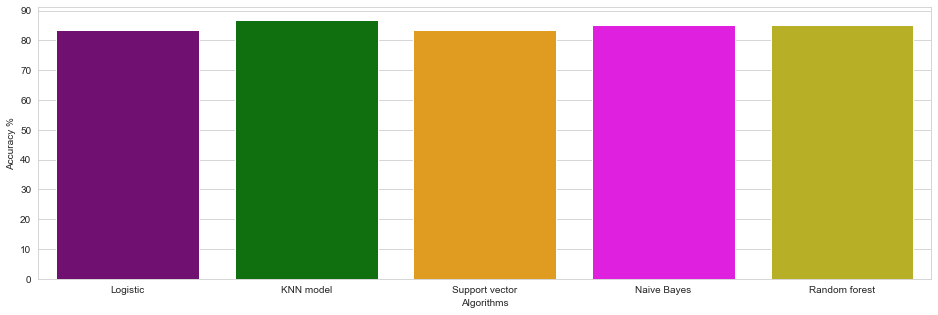

In [141]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

### Confusion matrix

In [147]:
# Predicted values
y_head_lr = lr.predict(x_test)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train, y_train)
y_head_knn = knn3.predict(x_test)
y_head_svm = svm.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_rf = rf.predict(x_test)

In [149]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_rf = confusion_matrix(y_test,y_head_rf)

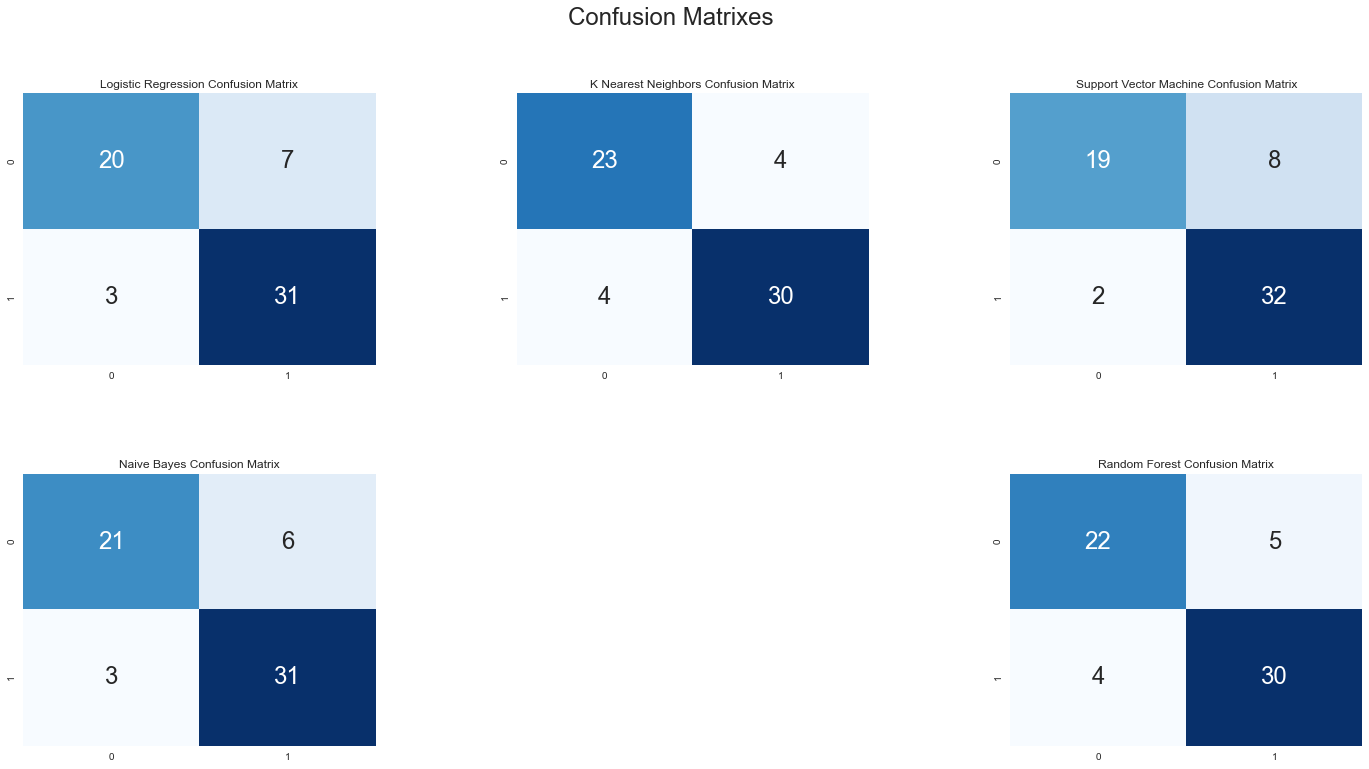

In [151]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [130]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.354073
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.486     
Dependent Variable: target           AIC:              240.5685  
Date:               2020-08-05 22:51 BIC:              288.8470  
No. Observations:   303              Log-Likelihood:   -107.28   
Df Model:           12               LL-Null:          -208.82   
Df Residuals:       290              LLR p-value:      7.5788e-37
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age            0.8123    0.9348   0.8690  0.3849  -1.0199   2.6444
sex           -1.6130    0.4498  -3.5861  0.0003  -2.4945  -0.